# Initial data exploration

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
train_path = "/Users/bdalam/Desktop/ml_project_wei_asif/Fall_Detection/data/Fall_Detection_yolov8/train"
image_name = "images/people-5-_jpg.rf.1f3fb4fffe090583a7a4e789f504387f.jpg"
image_path = os.path.join(train_path, image_name)
print(image_path)

/Users/bdalam/Desktop/ml_project_wei_asif/Fall_Detection/data/Fall_Detection_yolov8/train/images/people-5-_jpg.rf.1f3fb4fffe090583a7a4e789f504387f.jpg


Image path: /Users/bdalam/Desktop/ml_project_wei_asif/Fall_Detection/data/Fall_Detection_yolov8/train/images/people-5-_jpg.rf.1f3fb4fffe090583a7a4e789f504387f.jpg
Exists: True


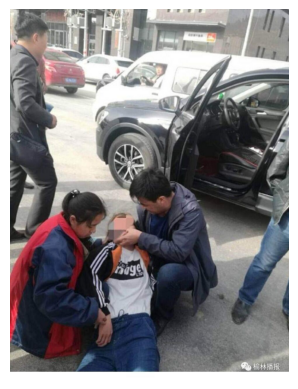

In [3]:
# filepath: /Users/bdalam/Desktop/ml_project_wei_asif/Fall_Detection/notebooks/data_exploration.ipynb
print("Image path:", image_path)
print("Exists:", os.path.exists(image_path))
img = cv2.imread(image_path)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.axis('off')
plt.show()

In [4]:
rgb_img.shape

(1272, 959, 3)

In [5]:
def read_yolo_label(label_path):
    boxes = []
    with open(label_path, 'r') as f:
        for line in f:
            cls, x, y, w, h = map(float, line.strip().split())
            boxes.append({
                "class_id": int(cls),
                "x_center": x,
                "y_center": y,
                "width": w,
                "height": h
            })
    return boxes


In [6]:
def yolo_to_pixel(box, img_w, img_h):
    x_c = box["x_center"] * img_w
    y_c = box["y_center"] * img_h
    w   = box["width"] * img_w
    h   = box["height"] * img_h

    x1 = int(x_c - w / 2)
    y1 = int(y_c - h / 2)
    x2 = int(x_c + w / 2)
    y2 = int(y_c + h / 2)

    return x1, y1, x2, y2


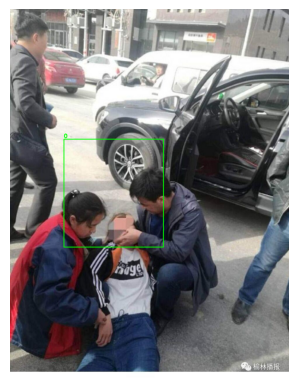

In [9]:
import cv2
import os

# img_path = "images/train/img001.jpg"
label_name = "labels/people-2-_jpg.rf.ada97ee1689b78f81e2b103b043fe18f.txt"
label_path = os.path.join(train_path, label_name)

img = cv2.imread(image_path)
h, w = img.shape[:2]

boxes = read_yolo_label(label_path)

for box in boxes:
    x1, y1, x2, y2 = yolo_to_pixel(box, w, h)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
    cv2.putText(img, str(box["class_id"]),
                (x1, y1 - 5),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.6, (0,255,0), 2)

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.axis('off')
plt.show()
